Zomato Data analysis Using Python

Step 1: Import Python Libraries

In [1]:
# pandas is used for data manipulation and analysis
import pandas as pd
# numpy is used for numerical operations
import numpy as np
# matplotlib and seaborn is used for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Create the dataframe

In [13]:
df = pd.read_csv("Downloads/Zomato data .csv")
df
# or 
# df = pd.read_csv("Downloads/Zomato data .csv", encoding = 'unicode_escape')
# df = pd.read_csv(r"Downloads/Zomato data .csv")

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [12]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [15]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Conclusion: There is no null value in dataset

In [14]:
# convert the data type of rate column and remove the denominator
df['rate'] = df['rate'].str.replace('/5','').astype(float)
print(df.rate)

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64


1) What type of restaurant do the majority of customers order from?

In [20]:
# we can find in two methods
# method 1
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [21]:
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

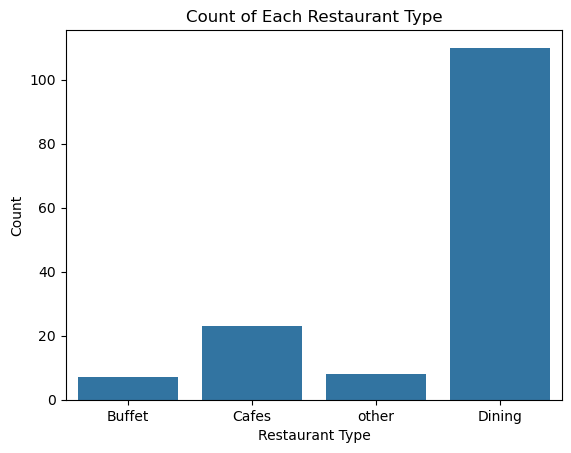

In [26]:
# method 2
sns.countplot(x = df['listed_in(type)'])
plt.title("Count of Each Restaurant Type")
plt.xlabel("Restaurant Type")
plt.ylabel("Count")
plt.show()

Conclusion: The majority of ther restaurant fall into the dinning category.

Dinning restaurants are preferred by a large number of individuals.

2) How many votes has each type of restaurant received from customers?

In [28]:
# groupby  helps us combine the rows that share the same restaurant type and calculate the total votes for each.
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

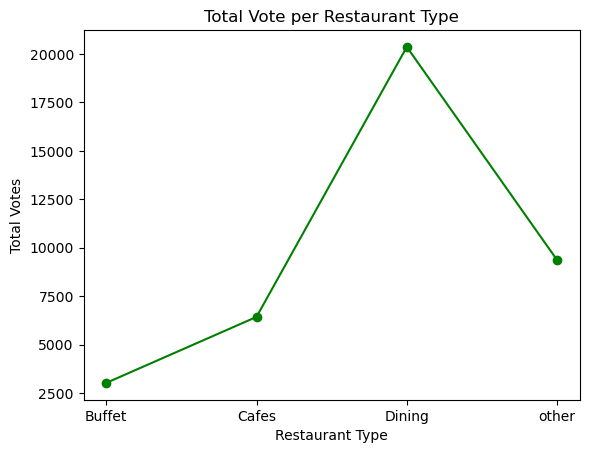

In [31]:
plt.plot(grouped_data, c= 'green', marker = 'o')
plt.title('Total Vote per Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Total Votes')
plt.show()

Conclusion: Dinning restaurants received maximum votes

3) What are the ratings that the majority of restaurants have received?

In [34]:
# method 1
rating_mode = df['rate'].mode()
# rating_mode = df['rate'].mode()[0] --> [0] this will give unimodal
rating_mode

3.8

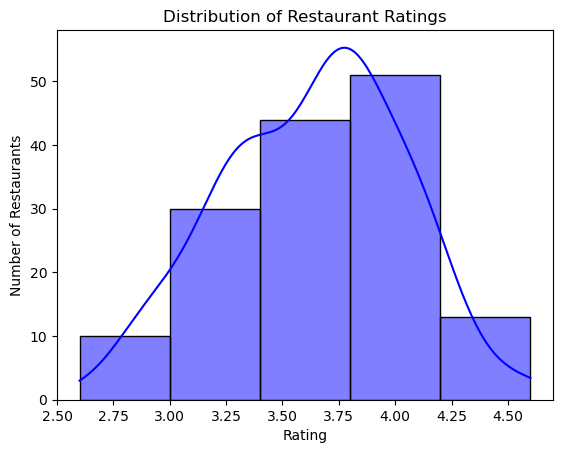

"bins = [1,2,3,4,5]\nlabels = ['1-2','2-3','3-4','4-5']\nsns.histplot(df['rate'], bins = bins, label = labels, kde = True, color = 'blue')\nplt.title('Distribution of Restaurant Ratings')\n#plt.xticks([1.5,2.5,3.5,4.5],labels)\nplt.xlabel('Rating')\nplt.ylabel('Number of Restaurants')\nplt.show()"

In [42]:
# method 2
sns.histplot(df['rate'], bins = 5, kde = True, color = 'blue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()
# or
'''bins = [1,2,3,4,5]
labels = ['1-2','2-3','3-4','4-5']
sns.histplot(df['rate'], bins = bins, label = labels, kde = True, color = 'blue')
plt.title('Distribution of Restaurant Ratings')
#plt.xticks([1.5,2.5,3.5,4.5],labels)
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()'''

Kernel Density Estimate (KDE): It adds a smooth curve to the histogram that represents the estimated probability density function (PDF) of the variable you're plotting.
You can see the shape of the distribution more clearly than with the bars of a histogram alone, which can sometimes appear uneven.

Conclusion: The majority of restaurants received ratings range from 3.5 to 4

4) Zomato has observed that most couples order most of their food online. What is their
average spending on each order?

In [43]:
df['approx_cost(for two people)'].mean()

418.2432432432432

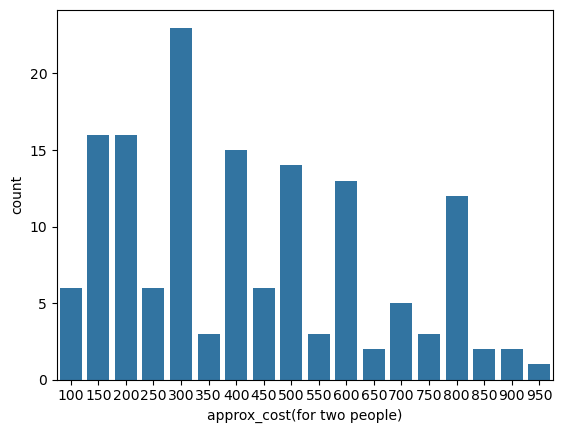

In [55]:
couple_spending = df['approx_cost(for two people)']
sns.countplot(x = couple_spending)
plt.show()

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

5) Which mode (online or offline) has received the maximum rating?

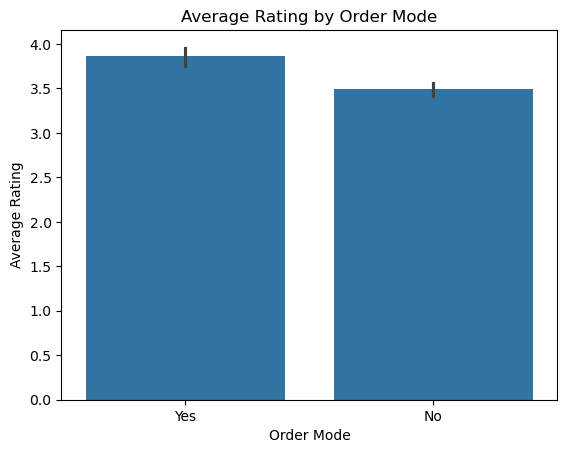

In [57]:
sns.barplot(x = 'online_order', y = 'rate', data = df)
plt.title('Average Rating by Order Mode')
plt.xlabel('Order Mode')
plt.ylabel('Average Rating')
plt.show()
# or we can do boxplot also
#sns.boxplot(x = 'online_order', y = 'rate', data = df)

Conclusion: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

6) Which type of restaurant received more offline orders, so that Zomato can provide those
customers with some good offers?

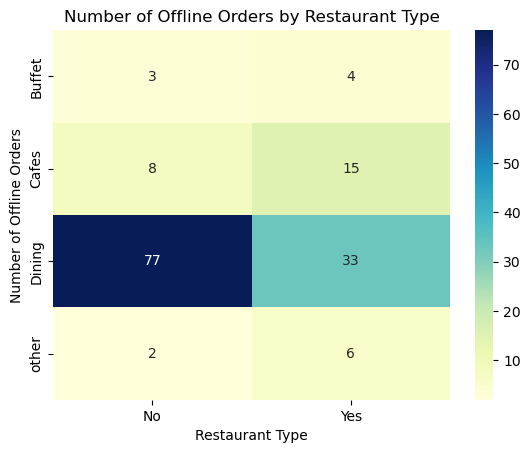

In [58]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.title('Number of Offline Orders by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Offline Orders')
plt.show()

Conclusion: Dinning restaurants primarily acccept offline orders, whereas cafes primarily receive online orders.This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at online. 